# Vector Distances

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style

style.use('seaborn')

%matplotlib inline

In [7]:
m = np.array([
    [2, 0], 
    [0, 2], 
    [4, -1]
])

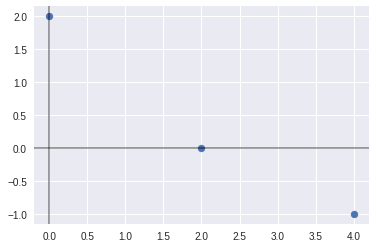

In [15]:
x,y = m[:,[0]],m[:,[1]]
plt.axhline(alpha=0.4, c='k')
plt.axvline(alpha=0.4, c='k')
plt.scatter(x,y)
plt.show()

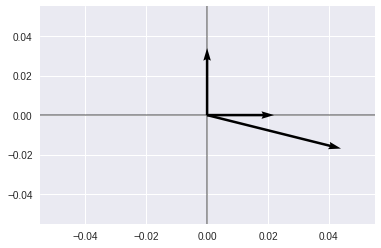

In [16]:
x,y = m[:,[0]],m[:,[1]]
plt.axhline(alpha=0.4, c='k')
plt.axvline(alpha=0.4, c='k')
plt.quiver(*np.zeros_like(m.T),x,y,scale=10)
plt.show()

## Minkowski distance

$d = (\sum_{i=1}^{n} \bigl| {||x||}_r  - {||z||}_r \bigr|^p)^{\frac{1}{p}}$


| p | distance metric |
|-|-|
| p = 1 | manhattan | 
| p = 2 | Euclidean | 
| $$p \rightarrow \infty$$ | max |

In [17]:
from scipy.spatial import minkowski_distance

In [24]:
m[0], m[1]

(array([2, 0]), array([0, 2]))

In [20]:
minkowski_distance(m[0], m[1], p=1)

4.0

In [21]:
minkowski_distance(m[0], m[1], p=2)

2.8284271247461903

In [23]:
minkowski_distance(m[0], m[1], p=np.inf)

2.0

## Manhattan distance

$\vec{v_1} = [x_1,y_1]$

$\vec{v_2} = [x_2,y_2]$

$d = |{x_2} - {x_1}| + |{y_2} - {y_1}|$


- complete distance between two points considering the path is not linear
- like going from one building to another

In [14]:
from sklearn.metrics.pairwise import manhattan_distances

In [73]:
m, manhattan_distances(m)

(array([[ 2,  0],
        [ 0,  2],
        [ 4, -1]]),
 array([[0., 4., 3.],
        [4., 0., 7.],
        [3., 7., 0.]]))

In [74]:
def manhattan_distances_scratch(v1,v2):    
    return np.abs(v2 - v1).sum()

In [75]:
manhattan_distances_scratch(m[0],m[1])

4

In [76]:
manhattan_distances_scratch(m[0],m[2])

3

In [78]:
manhattan_distances_scratch(m[1],m[2])

7

## Euclidean distance 

$\vec{v_1} = [x_1,y_1]$

$\vec{v_2} = [x_2,y_2]$

$d = \sqrt{({\vec{v_2} - \vec{v_1}})^2}$

$d = \sqrt{({x_2} - {x_1})^2 + ({y_2} - {y_1})^2}$


- direct distance between two points
- like flying from one city to another

In [8]:
from sklearn.metrics.pairwise import euclidean_distances

In [66]:
m,euclidean_distances(m)

(array([[ 2,  0],
        [ 0,  2],
        [ 4, -1]]),
 array([[0.        , 2.82842712, 2.23606798],
        [2.82842712, 0.        , 5.        ],
        [2.23606798, 5.        , 0.        ]]))

In [59]:
m[0], m[1]

(array([2, 0]), array([0, 2]))

In [69]:
def euclidean_distances_scratch(v1,v2):
    return np.sqrt(np.square(v2 - v1).sum())

In [70]:
euclidean_distances_scratch(m[0],m[1])

2.8284271247461903

In [71]:
euclidean_distances_scratch(m[0],m[2])

2.23606797749979

In [72]:
euclidean_distances_scratch(m[1],m[2])

5.0

## Cosine distance & Cosine Similarity


$\vec{A}.\vec{B} = ||\vec{A}|| * ||\vec{B}|| * cos(\theta)$

$\theta$ = Angle between $\vec{A}$ and $\vec{B}$

Cosine distance = $cosine(A,B) = \frac{\vec{A}.\vec{B}}{||\vec{A}|| * ||\vec{B}||} = \frac{\sum{A_i . B_i}}{\sqrt{\sum{A_i^2}}\sqrt{\sum{B_i^2}}}$

cosine similarity = 1 - cosine distance


- angular distance between two points

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
m,cosine_similarity(m)

(array([[ 2,  0],
        [ 0,  2],
        [ 4, -1]]),
 array([[ 1.        ,  0.        ,  0.9701425 ],
        [ 0.        ,  1.        , -0.24253563],
        [ 0.9701425 , -0.24253563,  1.        ]]))

In [42]:
def cosine_similarity_scratch(v1,v2):
    return (v1 * v2).sum() / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [45]:
cosine_similarity_scratch(m[0],m[1])

0.0

In [43]:
cosine_similarity_scratch(m[0],m[2])

0.9701425001453319

In [47]:
cosine_similarity_scratch(m[1],m[2])

-0.24253562503633297